In [1]:
import matplotlib.pyplot as plt
from utils import camb_clfile
import numpy as np
import healpy as hp

In [2]:
cl_unl = camb_clfile("/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lenspotential.dat")

In [3]:
%load_ext autoreload
%autoreload 2
import quest 

In [4]:
clpp = quest.RecoIni('litebird.ini')

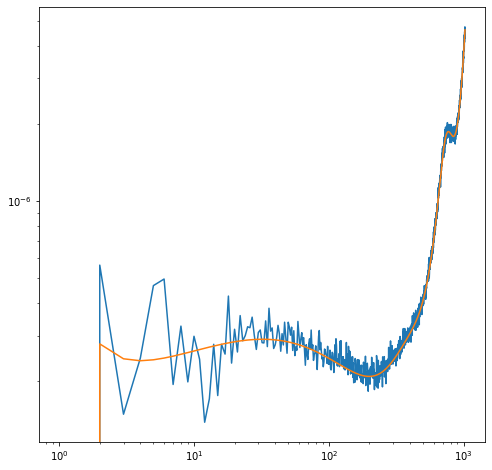

In [5]:
c = clpp.plot_recon_sim(0)

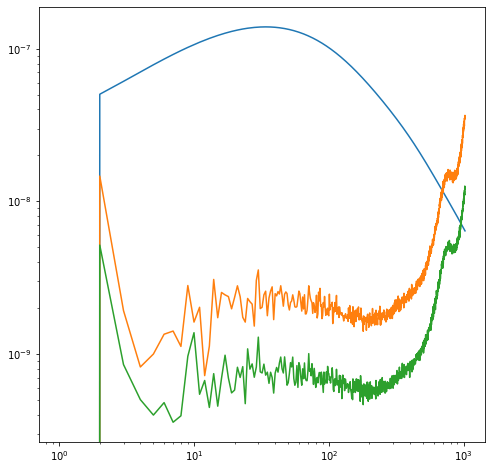

In [6]:
mf = clpp.plot_mf(np.arange(400,501),np.arange(200,501))

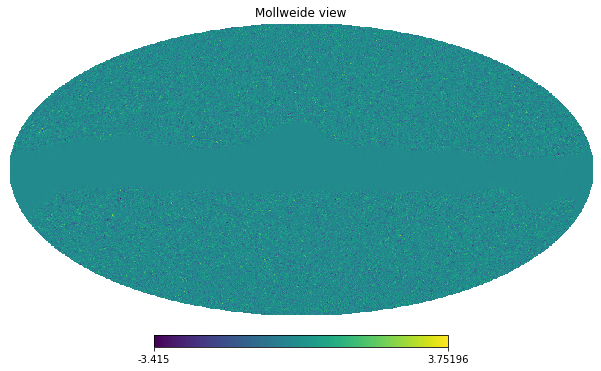

In [7]:
hp.mollview(clpp.get_kappa_map_sim(1))

/global/u2/l/lonappan/workspace/LBlens/quest.py:193: RuntimeWarning: divide by zero encountered in true_divide
  fl = 2/(self.L * (self.L + 1))
/global/u2/l/lonappan/workspace/LBlens/quest.py:207: RuntimeWarning: invalid value encountered in multiply
  plt.loglog(self.L,self.Lfac*hp.alm2cl(almi,lmax_out=self.Lmax)/self.fsky)


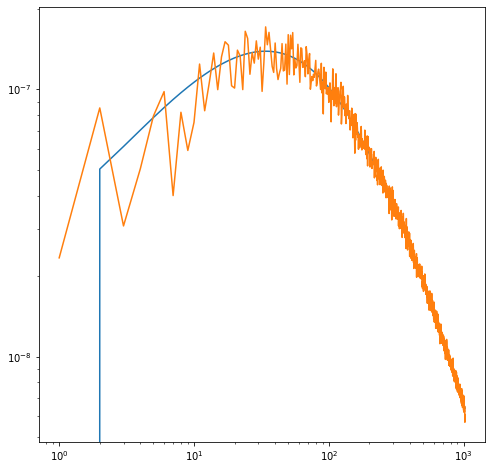

In [12]:
clpp.plot_input_sim(0)

/global/u2/l/lonappan/workspace/LBlens/quest.py:193: RuntimeWarning: divide by zero encountered in true_divide
  fl = 2/(self.L * (self.L + 1))


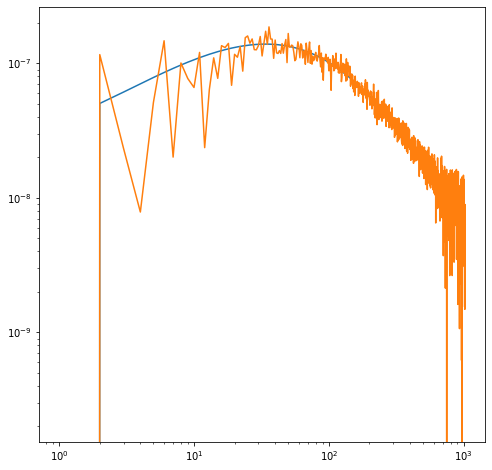

In [26]:
clpp.plot_inXout(0)

Calculating reconstruction stat: 100%|██████████| 100/100 [00:08<00:00, 11.50realisation/s]


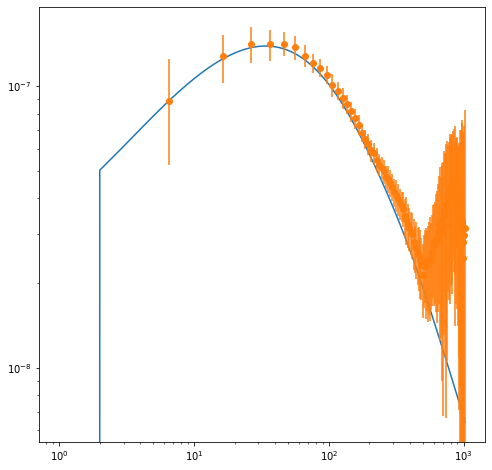

In [11]:
clpp.plot_qcl_stat()

In [27]:
r = clpp.response(0)

/global/u2/l/lonappan/workspace/LBlens/quest.py:193: RuntimeWarning: divide by zero encountered in true_divide
  fl = 2/(self.L * (self.L + 1))
/global/u2/l/lonappan/workspace/LBlens/quest.py:267: RuntimeWarning: invalid value encountered in true_divide
  


In [29]:
r[:50]

array([       nan,        nan, 2.30637591, 0.38232211, 0.11151209,
       0.65260047, 1.72076501, 0.21925849, 1.03542808, 0.75505497,
       0.62216021, 1.0932663 , 0.20787332, 0.54780225, 0.91806187,
       0.63350275, 1.08824325, 1.03640453, 1.09712828, 0.52915438,
       0.88914468, 0.8379307 , 0.99717604, 0.65009346, 1.14501131,
       1.17293852, 1.03179723, 1.10499648, 0.9169532 , 0.91200127,
       0.97449283, 1.14086588, 0.81724018, 1.00696203, 1.24603051,
       0.9948324 , 1.34363631, 1.09369838, 1.09169116, 0.78760169,
       1.0789048 , 0.86733812, 0.86068975, 0.90643385, 0.86571   ,
       1.02827752, 0.87514363, 1.01003112, 1.11246254, 0.7522709 ])

In [30]:
clpp.SNR()

Calculating reconstruction stat: 100%|██████████| 100/100 [00:02<00:00, 44.80realisation/s]


14.883310341240048

Calculating var: 100%|██████████| 100/100 [00:01<00:00, 62.33realisation/s]


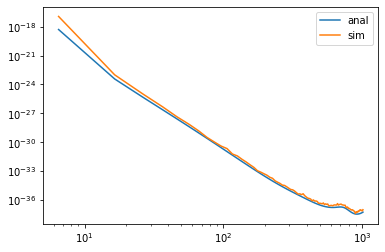

In [35]:
clpp.plot_var(100)

In [23]:
alms = clpp.get_input_phi_sim(0)

/global/u2/l/lonappan/workspace/LBlens/quest.py:193: RuntimeWarning: divide by zero encountered in true_divide
  fl = 2/(self.L * (self.L + 1))


In [18]:
maps = hp.alm2map(alms,nside=512)

In [24]:
alms

array([ 0.00000000e+00+0.j, -2.03514863e-06+0.j,  7.92884810e-05+0.j, ...,
        0.00000000e+00-0.j,  0.00000000e+00-0.j, -0.00000000e+00+0.j])